Md. Tanvir Jawad<br>ID:21101221

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'modsim.py')

Downloaded modsim.py


In [2]:
from modsim import *

In [3]:
download('https://github.com/AllenDowney/ModSim/raw/main/data/' +
         'glucose_insulin.csv')

'https://github.com/AllenDowney/ModSim/raw/main/data/glucose_insulin.csv'

Downloaded glucose_insulin.csv


'https://github.com/AllenDowney/ModSim/raw/main/data/glucose_insulin.csv'

In [4]:
from pandas import read_csv

data = read_csv('glucose_insulin.csv', index_col='time')

In [5]:
data.head()

,glucose,insulin
time,,
0,92,11
2,350,26
4,287,130
6,251,85
8,240,51


In [6]:
I = interpolate(data.insulin)

In [7]:
I(18)

array(31.66666667)

In [8]:
t_0 = data.index[0]
t_end = data.index[-1]
t_array = linrange(t_0, t_end)

In [9]:
I_array = I(t_array)

In [10]:
I_series = make_series(t_array, I_array)

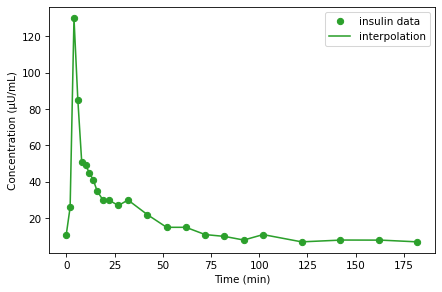

In [11]:
data.insulin.plot(style='o', color='C2', label='insulin data')
I_series.plot(color='C2', label='interpolation')

decorate(xlabel='Time (min)',
         ylabel='Concentration (μU/mL)')

In [12]:
I = interpolate(data.insulin, kind='cubic')
I_array = I(t_array)
I_series = make_series(t_array, I_array)

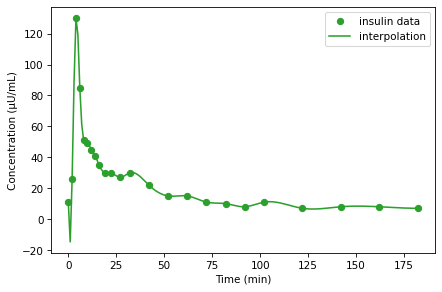

In [13]:
data.insulin.plot(style='o', color='C2', label='insulin data')
I_series.plot(color='C2', label='interpolation')

decorate(xlabel='Time (min)',
         ylabel='Concentration (μU/mL)')

Cubic interpolation provides a smoother curve, often suitable for data that is expected to vary smoothly over time. However, it's important to note that cubic interpolation can extend beyond the range of the available data. In the given example, some of the interpolated values are negative, which is not meaningful since concentrations cannot be negative. Therefore, in this case, it is advisable to opt for simplicity and use linear interpolation.

In [15]:
G = interpolate(data.glucose)
G_array = G(t_array)
G_series = make_series(t_array, G_array)

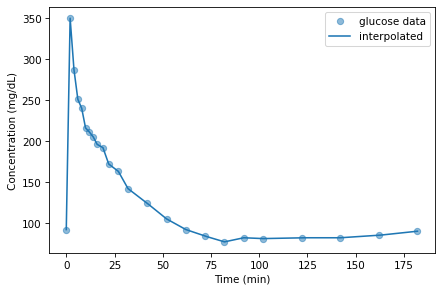

In [16]:
data.glucose.plot(style='o', alpha=0.5, label='glucose data')
G_series.plot(color='C0', label='interpolated')

decorate(xlabel='Time (min)',
         ylabel='Concentration (mg/dL)')

**MODIICATION**

In [22]:
from pandas import read_csv

data = read_csv('diabetes.csv', index_col='time')

FileNotFoundError: ignored

Let's explore the impact of different interpolation methods on the representation of datasets. The exercise involves the following steps:

Interpolate Insulin Data with Cubic Interpolation:

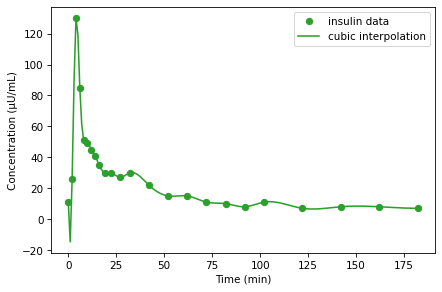

In [17]:
I_cubic = interpolate(data.insulin, kind='cubic')
I_cubic_array = I_cubic(t_array)
I_cubic_series = make_series(t_array, I_cubic_array)

data.insulin.plot(style='o', color='C2', label='insulin data')
I_cubic_series.plot(color='C2', label='cubic interpolation')

decorate(xlabel='Time (min)',
         ylabel='Concentration (μU/mL)')


Interpolate Another Dataset with Different Interpolation Method:

In [19]:
data.columns

Index(['glucose', 'insulin'], dtype='object')

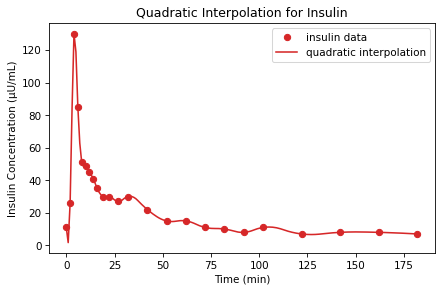

In [23]:
# Quadratic Interpolation for 'insulin' dataset
insulin_quadratic = interpolate(data.insulin, kind='quadratic')
insulin_quadratic_array = insulin_quadratic(t_array)
insulin_quadratic_series = make_series(t_array, insulin_quadratic_array)

data.insulin.plot(style='o', color='C3', label='insulin data')
insulin_quadratic_series.plot(color='C3', label='quadratic interpolation')

decorate(xlabel='Time (min)',
         ylabel='Insulin Concentration (μU/mL)',
         title='Quadratic Interpolation for Insulin')


# Analysis and Comparison

The differences observed between cubic and quadratic interpolations for the insulin dataset.
Consider any advantages or disadvantages associated with each method in this context.
For example, quadratic interpolation may provide a balance between smoothness and adherence to data points.